In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import gensim
import numpy as np
import pandas as pd
import spacy
import math

from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

import os, re, operator, warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 7E65-6E2D

 Directory of C:\Users\Nico\Desktop

03/10/2021  06:40 PM    <DIR>          .
03/10/2021  06:40 PM    <DIR>          ..
03/10/2021  06:38 PM    <DIR>          .ipynb_checkpoints
04/22/2020  02:51 PM               897 æTorrent.lnk
05/15/2018  11:36 PM         1,990,424 After_Effects_Set-Up.exe
03/08/2021  11:12 AM            15,092 AutoServed Sample Data.xlsx
03/01/2021  06:19 PM            53,616 bash shortcuts.JPG
03/01/2021  06:20 PM            60,725 bash shortcuts_2.JPG
10/30/2020  10:21 AM             2,184 Cisco Webex Meetings.lnk
01/25/2021  01:14 PM        52,674,611 Customer Details 01062021.xlsx
03/02/2021  02:22 AM             1,822 day1.py
03/08/2021  06:14 PM            23,539 day4_sprint4_reddit_scraper.ipynb
03/08/2021  08:50 PM            22,880 day6_sprint4_spacy.ipynb
03/10/2021  06:10 PM             2,760 day7_sprint4_nlp.ipynb
03/10/2021  06:40 PM            54,865 day8_sprint4_nlp_part_2.ipynb
01/02/2021 

In [3]:
df = pd.read_csv('tweets_01-08-2021.csv')

In [4]:
df = df.head(1000)

In [5]:
len(df)

1000

In [6]:
df

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
...,...,...,...,...,...,...,...,...,...
995,1331624798372438018,But 2020 is a long way from over! https://t.co...,f,f,Twitter for iPhone,187699,32040,2020-11-25 15:44:26,f
996,1327483778156154881,RT @ScottAdamsSays: The most corrupt instituti...,t,f,Twitter for iPhone,0,19473,2020-11-14 05:29:30,f
997,1321111793784262656,RT @jacobkschneider: Boston Herald endorses Pr...,t,f,Twitter for iPhone,0,6642,2020-10-27 15:29:31,f
998,1321111637991084033,RT @marklevinshow: The Boston Herald endorses ...,t,f,Twitter for iPhone,0,8716,2020-10-27 15:28:54,f


In [7]:
df_final = df[['text', 'date']]
df_final

,text,date
0,Republicans and Democrats have both created ou...,2011-08-02 18:07:48
1,I was thrilled to be back in the Great city of...,2020-03-03 01:34:50
2,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17 03:22:47
3,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12 20:10:58
4,RT @MZHemingway: Very friendly telling of even...,2020-01-17 13:13:59
...,...,...
995,But 2020 is a long way from over! https://t.co...,2020-11-25 15:44:26
996,RT @ScottAdamsSays: The most corrupt instituti...,2020-11-14 05:29:30
997,RT @jacobkschneider: Boston Herald endorses Pr...,2020-10-27 15:29:31
998,RT @marklevinshow: The Boston Herald endorses ...,2020-10-27 15:28:54


In [8]:
df_final['text_lower'] = df_final['text'].apply(str.lower)

In [9]:
df_final

,text,date,text_lower
0,Republicans and Democrats have both created ou...,2011-08-02 18:07:48,republicans and democrats have both created ou...
1,I was thrilled to be back in the Great city of...,2020-03-03 01:34:50,i was thrilled to be back in the great city of...
2,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17 03:22:47,rt @cbs_herridge: read: letter to surveillance...
3,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12 20:10:58,the unsolicited mail in ballot scam is a major...
4,RT @MZHemingway: Very friendly telling of even...,2020-01-17 13:13:59,rt @mzhemingway: very friendly telling of even...
...,...,...,...
995,But 2020 is a long way from over! https://t.co...,2020-11-25 15:44:26,but 2020 is a long way from over! https://t.co...
996,RT @ScottAdamsSays: The most corrupt instituti...,2020-11-14 05:29:30,rt @scottadamssays: the most corrupt instituti...
997,RT @jacobkschneider: Boston Herald endorses Pr...,2020-10-27 15:29:31,rt @jacobkschneider: boston herald endorses pr...
998,RT @marklevinshow: The Boston Herald endorses ...,2020-10-27 15:28:54,rt @marklevinshow: the boston herald endorses ...


In [10]:
df_final['text_no_num'] = df_final['text_lower'].str.replace('\d+', '')

In [11]:
df_final

,text,date,text_lower,text_no_num
0,Republicans and Democrats have both created ou...,2011-08-02 18:07:48,republicans and democrats have both created ou...,republicans and democrats have both created ou...
1,I was thrilled to be back in the Great city of...,2020-03-03 01:34:50,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...
2,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17 03:22:47,rt @cbs_herridge: read: letter to surveillance...,rt @cbs_herridge: read: letter to surveillance...
3,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12 20:10:58,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...
4,RT @MZHemingway: Very friendly telling of even...,2020-01-17 13:13:59,rt @mzhemingway: very friendly telling of even...,rt @mzhemingway: very friendly telling of even...
...,...,...,...,...
995,But 2020 is a long way from over! https://t.co...,2020-11-25 15:44:26,but 2020 is a long way from over! https://t.co...,but is a long way from over! https://t.co/usd...
996,RT @ScottAdamsSays: The most corrupt instituti...,2020-11-14 05:29:30,rt @scottadamssays: the most corrupt instituti...,rt @scottadamssays: the most corrupt instituti...
997,RT @jacobkschneider: Boston Herald endorses Pr...,2020-10-27 15:29:31,rt @jacobkschneider: boston herald endorses pr...,rt @jacobkschneider: boston herald endorses pr...
998,RT @marklevinshow: The Boston Herald endorses ...,2020-10-27 15:28:54,rt @marklevinshow: the boston herald endorses ...,rt @marklevinshow: the boston herald endorses ...


In [12]:
df_final["text_no_punct"] = df_final['text_no_num'].str.replace('[^\w\s]','')

In [13]:
df_final

,text,date,text_lower,text_no_num,text_no_punct
0,Republicans and Democrats have both created ou...,2011-08-02 18:07:48,republicans and democrats have both created ou...,republicans and democrats have both created ou...,republicans and democrats have both created ou...
1,I was thrilled to be back in the Great city of...,2020-03-03 01:34:50,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...
2,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17 03:22:47,rt @cbs_herridge: read: letter to surveillance...,rt @cbs_herridge: read: letter to surveillance...,rt cbs_herridge read letter to surveillance co...
3,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12 20:10:58,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...
4,RT @MZHemingway: Very friendly telling of even...,2020-01-17 13:13:59,rt @mzhemingway: very friendly telling of even...,rt @mzhemingway: very friendly telling of even...,rt mzhemingway very friendly telling of events...
...,...,...,...,...,...
995,But 2020 is a long way from over! https://t.co...,2020-11-25 15:44:26,but 2020 is a long way from over! https://t.co...,but is a long way from over! https://t.co/usd...,but is a long way from over httpstcousdkmvgmhk
996,RT @ScottAdamsSays: The most corrupt instituti...,2020-11-14 05:29:30,rt @scottadamssays: the most corrupt instituti...,rt @scottadamssays: the most corrupt instituti...,rt scottadamssays the most corrupt institution...
997,RT @jacobkschneider: Boston Herald endorses Pr...,2020-10-27 15:29:31,rt @jacobkschneider: boston herald endorses pr...,rt @jacobkschneider: boston herald endorses pr...,rt jacobkschneider boston herald endorses pres...
998,RT @marklevinshow: The Boston Herald endorses ...,2020-10-27 15:28:54,rt @marklevinshow: the boston herald endorses ...,rt @marklevinshow: the boston herald endorses ...,rt marklevinshow the boston herald endorses tr...


In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [15]:
df_final['text_no_stopwords'] = df_final['text_no_punct'].apply(lambda words: ' '.join(word for word in words.split() if word not in stop_words))


In [16]:
df_final

,text,date,text_lower,text_no_num,text_no_punct,text_no_stopwords
0,Republicans and Democrats have both created ou...,2011-08-02 18:07:48,republicans and democrats have both created ou...,republicans and democrats have both created ou...,republicans and democrats have both created ou...,republicans democrats created economic problems
1,I was thrilled to be back in the Great city of...,2020-03-03 01:34:50,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...,thrilled back great city charlotte north carol...
2,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17 03:22:47,rt @cbs_herridge: read: letter to surveillance...,rt @cbs_herridge: read: letter to surveillance...,rt cbs_herridge read letter to surveillance co...,rt cbs_herridge read letter surveillance court...
3,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12 20:10:58,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...,unsolicited mail ballot scam major threat demo...
4,RT @MZHemingway: Very friendly telling of even...,2020-01-17 13:13:59,rt @mzhemingway: very friendly telling of even...,rt @mzhemingway: very friendly telling of even...,rt mzhemingway very friendly telling of events...,rt mzhemingway friendly telling events comeys ...
...,...,...,...,...,...,...
995,But 2020 is a long way from over! https://t.co...,2020-11-25 15:44:26,but 2020 is a long way from over! https://t.co...,but is a long way from over! https://t.co/usd...,but is a long way from over httpstcousdkmvgmhk,long way httpstcousdkmvgmhk
996,RT @ScottAdamsSays: The most corrupt instituti...,2020-11-14 05:29:30,rt @scottadamssays: the most corrupt instituti...,rt @scottadamssays: the most corrupt instituti...,rt scottadamssays the most corrupt institution...,rt scottadamssays corrupt institutions individ...
997,RT @jacobkschneider: Boston Herald endorses Pr...,2020-10-27 15:29:31,rt @jacobkschneider: boston herald endorses pr...,rt @jacobkschneider: boston herald endorses pr...,rt jacobkschneider boston herald endorses pres...,rt jacobkschneider boston herald endorses pres...
998,RT @marklevinshow: The Boston Herald endorses ...,2020-10-27 15:28:54,rt @marklevinshow: the boston herald endorses ...,rt @marklevinshow: the boston herald endorses ...,rt marklevinshow the boston herald endorses tr...,rt marklevinshow boston herald endorses trump ...


In [18]:
sid = SentimentIntensityAnalyzer()
# for i in range(len(transformed_texts_3)):
#     print(transformed_texts_3[i] + ':')
#     scores = sid.polarity_scores(transformed_texts_3[i])
#     print(scores)

In [22]:
df_final['polarity'] = df_final['text_no_stopwords'].apply( lambda x: sid.polarity_scores(x)['compound'] )

In [23]:
df_final

,text,date,text_lower,text_no_num,text_no_punct,text_no_stopwords,polarity
0,Republicans and Democrats have both created ou...,2011-08-02 18:07:48,republicans and democrats have both created ou...,republicans and democrats have both created ou...,republicans and democrats have both created ou...,republicans democrats created economic problems,-0.1779
1,I was thrilled to be back in the Great city of...,2020-03-03 01:34:50,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...,thrilled back great city charlotte north carol...,0.9771
2,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17 03:22:47,rt @cbs_herridge: read: letter to surveillance...,rt @cbs_herridge: read: letter to surveillance...,rt cbs_herridge read letter to surveillance co...,rt cbs_herridge read letter surveillance court...,0.0000
3,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12 20:10:58,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...,unsolicited mail ballot scam major threat demo...,-0.9531
4,RT @MZHemingway: Very friendly telling of even...,2020-01-17 13:13:59,rt @mzhemingway: very friendly telling of even...,rt @mzhemingway: very friendly telling of even...,rt mzhemingway very friendly telling of events...,rt mzhemingway friendly telling events comeys ...,0.4939
...,...,...,...,...,...,...,...
995,But 2020 is a long way from over! https://t.co...,2020-11-25 15:44:26,but 2020 is a long way from over! https://t.co...,but is a long way from over! https://t.co/usd...,but is a long way from over httpstcousdkmvgmhk,long way httpstcousdkmvgmhk,0.0000
996,RT @ScottAdamsSays: The most corrupt instituti...,2020-11-14 05:29:30,rt @scottadamssays: the most corrupt instituti...,rt @scottadamssays: the most corrupt instituti...,rt scottadamssays the most corrupt institution...,rt scottadamssays corrupt institutions individ...,-0.1280
997,RT @jacobkschneider: Boston Herald endorses Pr...,2020-10-27 15:29:31,rt @jacobkschneider: boston herald endorses pr...,rt @jacobkschneider: boston herald endorses pr...,rt jacobkschneider boston herald endorses pres...,rt jacobkschneider boston herald endorses pres...,0.6124
998,RT @marklevinshow: The Boston Herald endorses ...,2020-10-27 15:28:54,rt @marklevinshow: the boston herald endorses ...,rt @marklevinshow: the boston herald endorses ...,rt marklevinshow the boston herald endorses tr...,rt marklevinshow boston herald endorses trump ...,0.3400


In [28]:
from datetime import datetime

In [30]:
df_final['datetime']= pd.to_datetime(df_final['date'])
df_datetime = df_final.set_index('datetime')
df_datetime

,text,date,text_lower,text_no_num,text_no_punct,text_no_stopwords,polarity
datetime,,,,,,,
2011-08-02 18:07:48,Republicans and Democrats have both created ou...,2011-08-02 18:07:48,republicans and democrats have both created ou...,republicans and democrats have both created ou...,republicans and democrats have both created ou...,republicans democrats created economic problems,-0.1779
2020-03-03 01:34:50,I was thrilled to be back in the Great city of...,2020-03-03 01:34:50,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...,thrilled back great city charlotte north carol...,0.9771
2020-01-17 03:22:47,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17 03:22:47,rt @cbs_herridge: read: letter to surveillance...,rt @cbs_herridge: read: letter to surveillance...,rt cbs_herridge read letter to surveillance co...,rt cbs_herridge read letter surveillance court...,0.0000
2020-09-12 20:10:58,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12 20:10:58,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...,unsolicited mail ballot scam major threat demo...,-0.9531
2020-01-17 13:13:59,RT @MZHemingway: Very friendly telling of even...,2020-01-17 13:13:59,rt @mzhemingway: very friendly telling of even...,rt @mzhemingway: very friendly telling of even...,rt mzhemingway very friendly telling of events...,rt mzhemingway friendly telling events comeys ...,0.4939
...,...,...,...,...,...,...,...
2020-11-25 15:44:26,But 2020 is a long way from over! https://t.co...,2020-11-25 15:44:26,but 2020 is a long way from over! https://t.co...,but is a long way from over! https://t.co/usd...,but is a long way from over httpstcousdkmvgmhk,long way httpstcousdkmvgmhk,0.0000
2020-11-14 05:29:30,RT @ScottAdamsSays: The most corrupt instituti...,2020-11-14 05:29:30,rt @scottadamssays: the most corrupt instituti...,rt @scottadamssays: the most corrupt instituti...,rt scottadamssays the most corrupt institution...,rt scottadamssays corrupt institutions individ...,-0.1280
2020-10-27 15:29:31,RT @jacobkschneider: Boston Herald endorses Pr...,2020-10-27 15:29:31,rt @jacobkschneider: boston herald endorses pr...,rt @jacobkschneider: boston herald endorses pr...,rt jacobkschneider boston herald endorses pres...,rt jacobkschneider boston herald endorses pres...,0.6124


In [42]:
df_resamped = df_datetime.resample('D').mean().ffill().reset_index()

df_2020 = df_resamped[df_resamped['datetime'] >= '2020-01-01']

<AxesSubplot:xlabel='datetime', ylabel='polarity'>

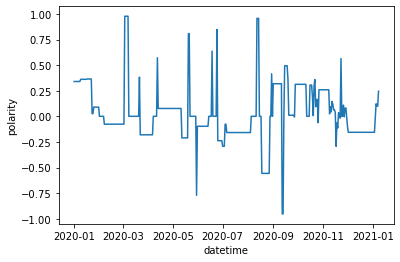

In [43]:
import seaborn as sns
sns.lineplot(data=df_2020, y='polarity', x='datetime' )

In [45]:
!pip install textblob
!pip install plotly

In [46]:
from textblob import TextBlob

def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def polarity(text):
    return TextBlob(text).sentiment.polarity

df_final["Subjectivity"] = df_final['text_no_stopwords'].apply(subjectivity)
df_final["Polarity"] = df_final['text_no_stopwords'].apply(polarity)

In [47]:
df_final

,text,date,text_lower,text_no_num,text_no_punct,text_no_stopwords,polarity,datetime,Subjectivity,Polarity
0,Republicans and Democrats have both created ou...,2011-08-02 18:07:48,republicans and democrats have both created ou...,republicans and democrats have both created ou...,republicans and democrats have both created ou...,republicans democrats created economic problems,-0.1779,2011-08-02 18:07:48,0.200000,0.200000
1,I was thrilled to be back in the Great city of...,2020-03-03 01:34:50,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...,thrilled back great city charlotte north carol...,0.9771,2020-03-03 01:34:50,0.483333,0.450000
2,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17 03:22:47,rt @cbs_herridge: read: letter to surveillance...,rt @cbs_herridge: read: letter to surveillance...,rt cbs_herridge read letter to surveillance co...,rt cbs_herridge read letter surveillance court...,0.0000,2020-01-17 03:22:47,0.100000,0.100000
3,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12 20:10:58,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...,unsolicited mail ballot scam major threat demo...,-0.9531,2020-09-12 20:10:58,0.454762,0.029464
4,RT @MZHemingway: Very friendly telling of even...,2020-01-17 13:13:59,rt @mzhemingway: very friendly telling of even...,rt @mzhemingway: very friendly telling of even...,rt mzhemingway very friendly telling of events...,rt mzhemingway friendly telling events comeys ...,0.4939,2020-01-17 13:13:59,0.425000,0.212500
...,...,...,...,...,...,...,...,...,...,...
995,But 2020 is a long way from over! https://t.co...,2020-11-25 15:44:26,but 2020 is a long way from over! https://t.co...,but is a long way from over! https://t.co/usd...,but is a long way from over httpstcousdkmvgmhk,long way httpstcousdkmvgmhk,0.0000,2020-11-25 15:44:26,0.400000,-0.050000
996,RT @ScottAdamsSays: The most corrupt instituti...,2020-11-14 05:29:30,rt @scottadamssays: the most corrupt instituti...,rt @scottadamssays: the most corrupt instituti...,rt scottadamssays the most corrupt institution...,rt scottadamssays corrupt institutions individ...,-0.1280,2020-11-14 05:29:30,0.900000,-0.050000
997,RT @jacobkschneider: Boston Herald endorses Pr...,2020-10-27 15:29:31,rt @jacobkschneider: boston herald endorses pr...,rt @jacobkschneider: boston herald endorses pr...,rt jacobkschneider boston herald endorses pres...,rt jacobkschneider boston herald endorses pres...,0.6124,2020-10-27 15:29:31,0.383333,0.100000
998,RT @marklevinshow: The Boston Herald endorses ...,2020-10-27 15:28:54,rt @marklevinshow: the boston herald endorses ...,rt @marklevinshow: the boston herald endorses ...,rt marklevinshow the boston herald endorses tr...,rt marklevinshow boston herald endorses trump ...,0.3400,2020-10-27 15:28:54,0.000000,0.000000


In [49]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df_final['Analysis'] = df_final['Polarity'].apply(getAnalysis)

In [50]:
df_final

,text,date,text_lower,text_no_num,text_no_punct,text_no_stopwords,polarity,datetime,Subjectivity,Polarity,Analysis
0,Republicans and Democrats have both created ou...,2011-08-02 18:07:48,republicans and democrats have both created ou...,republicans and democrats have both created ou...,republicans and democrats have both created ou...,republicans democrats created economic problems,-0.1779,2011-08-02 18:07:48,0.200000,0.200000,Positive
1,I was thrilled to be back in the Great city of...,2020-03-03 01:34:50,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...,i was thrilled to be back in the great city of...,thrilled back great city charlotte north carol...,0.9771,2020-03-03 01:34:50,0.483333,0.450000,Positive
2,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17 03:22:47,rt @cbs_herridge: read: letter to surveillance...,rt @cbs_herridge: read: letter to surveillance...,rt cbs_herridge read letter to surveillance co...,rt cbs_herridge read letter surveillance court...,0.0000,2020-01-17 03:22:47,0.100000,0.100000,Positive
3,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12 20:10:58,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...,the unsolicited mail in ballot scam is a major...,unsolicited mail ballot scam major threat demo...,-0.9531,2020-09-12 20:10:58,0.454762,0.029464,Positive
4,RT @MZHemingway: Very friendly telling of even...,2020-01-17 13:13:59,rt @mzhemingway: very friendly telling of even...,rt @mzhemingway: very friendly telling of even...,rt mzhemingway very friendly telling of events...,rt mzhemingway friendly telling events comeys ...,0.4939,2020-01-17 13:13:59,0.425000,0.212500,Positive
...,...,...,...,...,...,...,...,...,...,...,...
995,But 2020 is a long way from over! https://t.co...,2020-11-25 15:44:26,but 2020 is a long way from over! https://t.co...,but is a long way from over! https://t.co/usd...,but is a long way from over httpstcousdkmvgmhk,long way httpstcousdkmvgmhk,0.0000,2020-11-25 15:44:26,0.400000,-0.050000,Negative
996,RT @ScottAdamsSays: The most corrupt instituti...,2020-11-14 05:29:30,rt @scottadamssays: the most corrupt instituti...,rt @scottadamssays: the most corrupt instituti...,rt scottadamssays the most corrupt institution...,rt scottadamssays corrupt institutions individ...,-0.1280,2020-11-14 05:29:30,0.900000,-0.050000,Negative
997,RT @jacobkschneider: Boston Herald endorses Pr...,2020-10-27 15:29:31,rt @jacobkschneider: boston herald endorses pr...,rt @jacobkschneider: boston herald endorses pr...,rt jacobkschneider boston herald endorses pres...,rt jacobkschneider boston herald endorses pres...,0.6124,2020-10-27 15:29:31,0.383333,0.100000,Positive
998,RT @marklevinshow: The Boston Herald endorses ...,2020-10-27 15:28:54,rt @marklevinshow: the boston herald endorses ...,rt @marklevinshow: the boston herald endorses ...,rt marklevinshow the boston herald endorses tr...,rt marklevinshow boston herald endorses trump ...,0.3400,2020-10-27 15:28:54,0.000000,0.000000,Neutral


In [54]:
import plotly.express as px

In [57]:
fig = px.scatter(df_final, x='Polarity', y='Subjectivity', color='Analysis', size='Subjectivity')

fig.update_layout(title='Sentiment Analysis', \
                 shapes=[dict(type='line',
                             yref='paper', y0=0, y1=1, xref='x', x0=0, x1=0)])

fig.show()